<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 3.1.3

## Data

The Philippine Statistics Authority (PSA) spearheads the conduct of the Family Income and Expenditure Survey (FIES) nationwide. The survey, which is undertaken every three (3) years, is aimed at providing data on family income and expenditure, including, among others, levels of consumption by item of expenditure, sources of income in cash, and related information affecting income and expenditure levels and patterns in the Philippines.

You can download the data from [here](https://www.kaggle.com/grosvenpaul/family-income-and-expenditure).

The purpose of today's lab is to use simulation to visualize the sampling distribution for the sample mean. The Central Limit Theorem (CLT) tells us that as our sample size gets larger, the sampling distribution of the sample mean converges to a normal distribution. Therefore, when we have a large sample size, we can say that the sampling distribution for the sample mean is approximately normal, regardless of the distribution from which we are sampling.

Let's start by taking a look at the data, **`Total Household Income`** will serve as a "population" for the purposes of this lab. 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
house_hold_csv = "C:\\Users\\Sajeewa\\Downloads\\Python\\Family_Income_and_Expenditure.csv"
# Read CSV
house = pd.read_csv(house_hold_csv)

In [5]:
# Head
house.head()

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,1,0,0,0,0,3,0,0,0,1


In [6]:
# Tail
house.tail()

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
41539,119773,XII - SOCCSKSARGEN,44875,Enterpreneurial Activities,1,23675,21542,1476,6120,1632,...,0,0,0,0,0,1,0,0,0,0
41540,137320,XII - SOCCSKSARGEN,31157,Enterpreneurial Activities,1,2691,1273,1886,4386,1840,...,0,0,0,0,0,3,0,0,0,0
41541,133171,XII - SOCCSKSARGEN,45882,Enterpreneurial Activities,2,28646,27339,480,4796,1232,...,0,0,0,0,0,1,0,0,0,0
41542,129500,XII - SOCCSKSARGEN,81416,Enterpreneurial Activities,1,29996,26655,2359,17730,2923,...,0,0,0,0,0,2,0,0,0,0
41543,128598,XII - SOCCSKSARGEN,78195,Enterpreneurial Activities,1,43485,41205,1985,7735,2062,...,0,0,0,0,0,1,0,0,0,0


In [7]:
# Shape
house.shape

(41544, 60)

In [8]:
# Data Types
type(house)

pandas.core.frame.DataFrame

#### Surveying the populations

##### 1. Create a histogram of `Total Household Income`.

(array([3.9380e+03, 1.1265e+04, 8.5400e+03, 4.8330e+03, 3.2790e+03,
        2.3950e+03, 1.6330e+03, 1.2040e+03, 9.4900e+02, 6.8600e+02,
        5.0700e+02, 4.1600e+02, 3.4000e+02, 2.4500e+02, 2.0500e+02,
        1.5600e+02, 1.4200e+02, 1.1900e+02, 1.0400e+02, 8.6000e+01,
        5.3000e+01, 4.7000e+01, 4.4000e+01, 3.9000e+01, 3.8000e+01,
        2.7000e+01, 2.8000e+01, 1.9000e+01, 1.3000e+01, 1.6000e+01,
        1.7000e+01, 1.1000e+01, 1.6000e+01, 9.0000e+00, 1.2000e+01,
        1.0000e+01, 7.0000e+00, 6.0000e+00, 5.0000e+00, 9.0000e+00,
        4.0000e+00, 7.0000e+00, 9.0000e+00, 4.0000e+00, 2.0000e+00,
        2.0000e+00, 0.0000e+00, 5.0000e+00, 2.0000e+00, 2.0000e+00,
        2.0000e+00, 2.0000e+00, 1.0000e+00, 1.0000e+00, 4.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
        2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 3.0000e+00,
        1.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00, 2.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 1.00

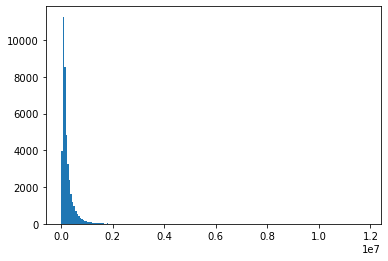

In [9]:
# ANSWER
plt.hist(house['Total Household Income'],bins=200)

##### 2. How would you describe the shape of this population?

In [10]:
#Skewed to right
house.describe()

,Total Household Income,Total Food Expenditure,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,Vegetables Expenditure,Restaurant and hotels Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
count,4.154400e+04,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,...,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000
mean,2.475556e+05,85099.158194,0.429858,25133.723642,18195.825005,10540.072574,10529.318337,2550.474990,5006.918568,15436.566075,...,0.394184,0.319806,0.129814,0.081215,0.060610,1.905738,0.315015,0.135038,0.013119,0.289885
std,2.868805e+05,51637.947682,0.676666,13466.482984,11727.224350,10497.727757,7812.201613,2969.752879,3300.175236,23705.195929,...,0.537025,0.478482,0.448673,0.346786,0.276732,1.558130,0.739698,0.354083,0.127171,0.558408
min,1.128500e+04,2947.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.048950e+05,51017.250000,0.000000,16556.000000,11020.000000,3353.750000,5504.000000,1024.750000,2873.000000,1930.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.640795e+05,72985.500000,0.000000,23324.000000,16620.000000,7332.500000,8695.000000,1820.000000,4314.000000,7314.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
75%,2.911385e+05,105635.500000,1.000000,31439.000000,23920.000000,14292.000000,13388.000000,3100.000000,6304.250000,19921.250000,...,1.000000,1.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
max,1.181599e+07,827565.000000,2.000000,765864.000000,758326.000000,261566.000000,188208.000000,273769.000000,74800.000000,725296.000000,...,5.000000,3.000000,5.000000,5.000000,4.000000,10.000000,6.000000,3.000000,3.000000,5.000000


**ANSWER:**

##### 2. What is the mean income of this population?

In [21]:
# ANSWER
house_mean = house['Total Household Income'].mean()
house_mean

247555.58480165608

##### 3. What sampling statistic/point estimate would you use to estimate the mean of this population if you were given a random sample from the population?

**ANSWER

#### Simulated sampling (sample means)

Now, we'd like to get an idea of what happens when we take multiple random samples of size 5. 

Take 10 sample (size=5) from the entire population. Calculate means for each sample. Now make a histogram of all the sample means.

- Describe the shape of the histogram.
- What is the center of the distribution of sample means?

##### 4. Simulation with `sample_size=5`

Take 10 samples, but with a sample size of 5.

In [31]:
# ANSWER
def getSample(n,a):
    house_sample_list =[]
    for i in range(n):
        house_sample = house.sample(a)
        house_sample_list.append(house_sample['Total Household Income'].mean())
    return house_sample_list 

def calculate_sample_mean(df, column_name, N=10, sample_size=5):
   sample_mean_list = []

    for i in range(N):
        df_sample = df.sample(n=sample_size)
        sample_mean_list.append(df_sample[column_name].mean())
    
    return sample_mean_list

In [32]:
print(getSample(5,5))

[156182.4, 160049.8, 287488.6, 199657.8, 461742.0]


###### 4.A Make a histogram of all the sample means

In [0]:
# ANSWER

In [28]:
def visual_sample_mean(population_mean, sample_mean_list):
    sample_mean = np.mean(sample_mean_list)
    ax = sns.distplot(sample_mean_list);
    
    # plot a vertical line for population mean and sample mean
    ax.axvline(population_mean, color='black', linestyle='solid', lw=1)
    ax.axvline(sample_mean, color='red', linestyle='dashed', lw=1)
    
    plt.xlabel('Mean of Samples')
    plt.ylabel('Frequency')

    plt.show()

In [33]:
house_sample_list = getSample(5,5)

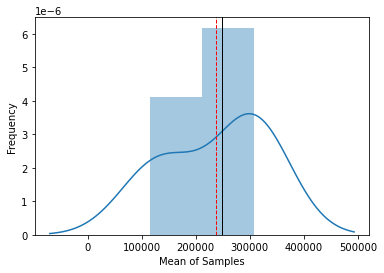

In [30]:
visual_sample_mean(house_mean,house_sample_list)

###### 4.B Describe the shape of the histogram.

**ANSWER:**

##### 7. Simulation with `sample_size=15`

let's try taking another 1000 samples, but with a sample size of 15

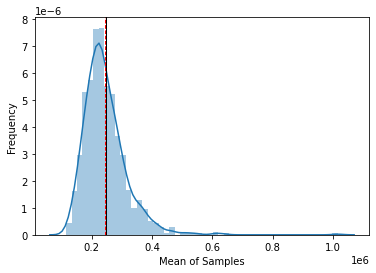

In [35]:
# ANSWER
house_sample_100 = getSample(1000,15)
visual_sample_mean(house_mean,house_sample_100)

##### 8. Simulation with `sample_size=50`

Let's try taking another 1000 samples, but with a sample size of 50

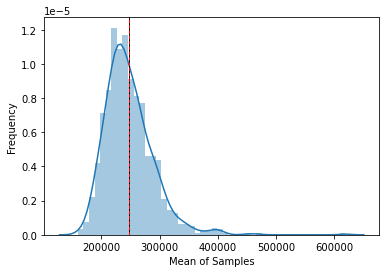

In [36]:
# ANSWER
house_sample_100 = getSample(1000,50)
visual_sample_mean(house_mean,house_sample_100)

###### 8.A Describe the shape of the histogram of sample means (using sample size of 50)

**ANSWER:**

###### 8.B What is mean of the distribution of sample means?

In [38]:
# ANSWER
np.mean(house_sample_100)

247612.03806

**ANSWER:**

> If repeated random samples of a given size n are taken from a population of values for a quantitative variable, where the population mean is μ (mu) and the population standard deviation is σ (sigma) then the mean of all sample means (x-bars) is population mean μ (mu).

###### 8.C As the sample size grew, did your results confirm the CLT?

**ANSWER:**



---



---



> > > > > > > > > © 2019 Institute of Data


---



---



